In [17]:

import warnings
import pandas as pd
import matplotlib.pyplot as plt

from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

warnings.filterwarnings('ignore')
pd.options.display.max_colwidth=100
%matplotlib inline


In [18]:

def display(to_display, message=''):
    print()
    if len(message) > 0:
        print('  > ' + str(message))
        print()
    print(to_display)
    print()
    

In [19]:

# example 1 
data = {
    
    'ID':[1,2,3,4,5,6],
    'Onion':[1,0,0,1,1,1],
    'Potato':[1,1,0,1,1,1],
    'Burger':[1,1,0,0,1,1],
    'Milk':[0,1,1,1,0,1],
    'Beer':[0,0,1,0,1,0]

}

df = pd.DataFrame(data)

frequent_itemsets = apriori(
    
    df[['Onion', 'Potato', 'Burger', 'Milk', 'Beer' ]], 
    min_support=0.50, 
    use_colnames=True

)

display(frequent_itemsets, 'frequent_itemsets')

rules = association_rules(frequent_itemsets, metric='lift', min_threshold=1)

display(rules, 'rules')



  > frequent_itemsets

    support                 itemsets
0  0.666667                  (Onion)
1  0.833333                 (Potato)
2  0.666667                 (Burger)
3  0.666667                   (Milk)
4  0.666667          (Potato, Onion)
5  0.500000          (Burger, Onion)
6  0.666667         (Potato, Burger)
7  0.500000           (Milk, Potato)
8  0.500000  (Potato, Burger, Onion)


  > rules

         antecedents       consequents  antecedent support  \
0           (Potato)           (Onion)            0.833333   
1            (Onion)          (Potato)            0.666667   
2           (Burger)           (Onion)            0.666667   
3            (Onion)          (Burger)            0.666667   
4           (Potato)          (Burger)            0.833333   
5           (Burger)          (Potato)            0.666667   
6   (Potato, Burger)           (Onion)            0.666667   
7    (Potato, Onion)          (Burger)            0.666667   
8    (Burger, Onion)          (Pota

In [20]:

# example 2
retail_shopping_basket = {
    
    'ID':[1,2,3,4,5,6],
    'Basket':[
        
        ['Beer', 'Diaper', 'Pretzels', 'Chips', 'Aspirin'],
        ['Diaper', 'Beer', 'Chips', 'Lotion', 'Juice', 'BabyFood', 'Milk'],
        ['Soda', 'Chips', 'Milk'],
        ['Soup', 'Beer', 'Diaper', 'Milk', 'IceCream'],
        ['Soda', 'Coffee', 'Milk', 'Bread'],
        ['Beer', 'Chips']
                                
    ]
                         
}

retail = pd.DataFrame(retail_shopping_basket)
retail = retail.join(retail.Basket.str.join(',').str.get_dummies(','))
retail = retail.drop('Basket', axis=1)

frequent_itemsets = apriori(retail.drop('ID', axis=1), use_colnames=True)

display(frequent_itemsets, 'frequent_itemsets')

rules = association_rules(frequent_itemsets, metric='lift')

display(rules, 'rules')



  > frequent_itemsets

    support        itemsets
0  0.666667          (Beer)
1  0.666667         (Chips)
2  0.500000        (Diaper)
3  0.666667          (Milk)
4  0.500000   (Beer, Chips)
5  0.500000  (Beer, Diaper)


  > rules

  antecedents consequents  antecedent support  consequent support  support  \
0      (Beer)     (Chips)            0.666667            0.666667      0.5   
1     (Chips)      (Beer)            0.666667            0.666667      0.5   
2      (Beer)    (Diaper)            0.666667            0.500000      0.5   
3    (Diaper)      (Beer)            0.500000            0.666667      0.5   

   confidence   lift  leverage  conviction  zhangs_metric  
0        0.75  1.125  0.055556    1.333333       0.333333  
1        0.75  1.125  0.055556    1.333333       0.333333  
2        0.75  1.500  0.166667    2.000000       1.000000  
3        1.00  1.500  0.166667         inf       0.666667  



In [26]:

# example 3
movies = pd.read_csv('./movies.csv')
movies_ohe = movies.drop('genres', axis=1).join(movies.genres.str.get_dummies())

stat_1 = movies_ohe.drop(['title', 'movieId'], axis=1).apply(pd.value_counts)
stat_1 = stat_1.transpose().drop(0, axis=1).sort_values(by=1, ascending=False).rename(columns={1:'No. of movies'})

stat_2 = movies.join(movies.genres.str.split('|').reset_index().genres.str.len(), rsuffix='r').rename(columns={'genresr':'genre_count'})
stat_2 = stat_2[stat_2['genre_count']==1].drop('movieId', axis=1).groupby('genres').sum().sort_values(by='genre_count', ascending=False)

stat = stat_1.merge(stat_2, how='left', left_index=True, right_index=True).fillna(0)
stat.genre_count = stat.genre_count.astype(int)
stat.rename(columns={'genre_count': 'No. of movies with only 1 genre'}, inplace=True)

display(stat, 'stat')



  > stat

                    No. of movies  \
Drama                        4365   
Comedy                       3315   
Thriller                     1729   
Action                       1545   
Romance                      1545   
Adventure                    1117   
Crime                        1100   
Horror                        877   
Sci-Fi                        792   
Fantasy                       654   
Children                      583   
Mystery                       543   
Documentary                   495   
Animation                     447   
Musical                       394   
War                           367   
Western                       168   
IMAX                          153   
Film-Noir                     133   
(no genres listed)             18   

                                                                                                                  title  \
Drama               Nixon (1995)Othello (1995)Dangerous Minds (1995)Cry, the Beloved Cou

Text(0.5, 1.0, 'Distribution of number of genres')

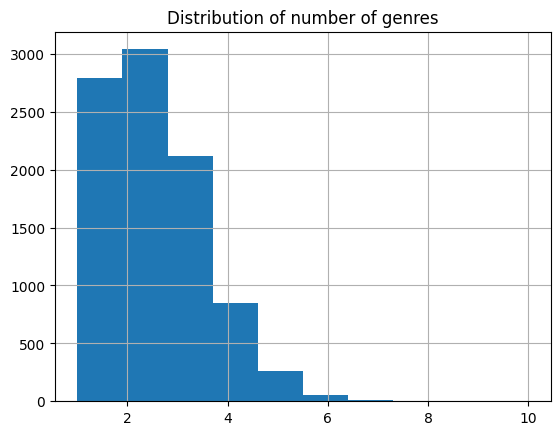

In [27]:

movies_ohe.set_index(['movieId','title']).sum(axis=1).hist()

plt.title('Distribution of number of genres')
